## 1. IMPORT LIBRARIES & FETCH DATA

In [8]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # To handle missing data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, f1_score
print("--- Step 1: Fetching Data from UCI ---")

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y_raw = heart_disease.data.targets # Will be a DataFrame with a 'num' column

print("Data fetched successfully.")

--- Step 1: Fetching Data from UCI ---
Data fetched successfully.


## 2. PREPROCESSING

In [9]:
print("--- Step 2: Preprocessing Data ---")

# 1. Handle Missing Values 
# We'll replace missing values with the median of their column.
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Put the imputed data back into a DataFrame with the original column names
X = pd.DataFrame(X_imputed, columns=X.columns)
print("Missing values handled using median imputation.")

# 2. Process the Target Variable (y)
# We convert the target 'num' (0, 1, 2, 3, 4) to binary (0 or 1)
# 0 stays 0 (no disease), and 1, 2, 3, 4 become 1 (has disease)
y = y_raw['num'].apply(lambda x: 1 if x > 0 else 0)
print("Target variable converted to binary (0 = no disease, 1 = has disease).")

--- Step 2: Preprocessing Data ---
Missing values handled using median imputation.
Target variable converted to binary (0 = no disease, 1 = has disease).


## 3. DATA SPLITTING & SCALING

In [10]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
# This standardizes features to have 0 mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the same scaler from training

print("--- Step 3: Data Split and Scaled ---")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

--- Step 3: Data Split and Scaled ---
Training data shape: (242, 13)
Testing data shape: (61, 13)


## 4. Train & Evaluate

--- Training: Logistic Regression ---
  Accuracy: 0.8852
  Recall (Key Metric): 0.9062
  Precision: 0.8788
  F1-Score: 0.8923


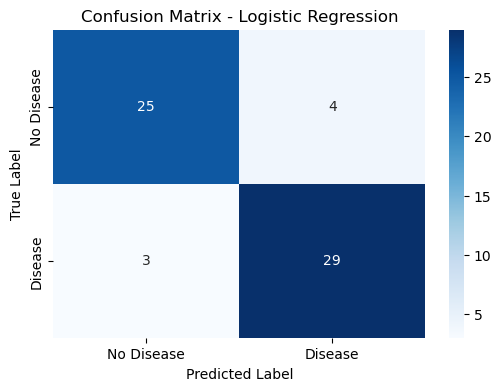

In [12]:
print("--- Training: Logistic Regression ---")

# 1. Initialize and train the model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# 2. Make predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# 3. Calculate all metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Recall (Key Metric): {recall_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  F1-Score: {f1_lr:.4f}")

# 4. Visualize the Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()